#Stock_Market_Sentiment_Base_Analysis

Here we are gonna do sentiment base analysis of stock market for particular stock data.

We are using NLP Model.

First We are creating generalized model without text processing including CounterVectorizer, MultinomialNB and TfidTransformer with Pipeline Architecture. Then, We are creating same model with text processing to get more accuracy.

Data Source: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset



#Start by connecting gdrive into the google colab

In [112]:
 from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Import Required Libraries

In [113]:
import numpy as np
import pandas as pd

#Load CSV from Google Drive

In [114]:
#df = pd.read_csv('/content/gdrive/MyDrive/stock/stock_data.csv',sep=',')
df = pd.read_csv('/content/gdrive/MyDrive/stock/BTC_tweets_daily_example.csv',sep=',')
df = df[['Tweet','Sentiment']]
df = df[df['Sentiment']!="['neutral']"]
df = df[df['Sentiment']!="0.0"]
df['Text']=df['Tweet']
df = df.drop('Tweet',axis=1)
df['Sentiment'].replace({"['positive']": 'Bull', "['negative']": 'Bear'}, inplace=True)

#Visualisation of Dataset

In [115]:
df.head() 


,Sentiment,Text
2,Bull,RT @tippereconomy: Another use case for #block...
3,Bull,free coins https://t.co/DiuoePJdap
4,Bull,RT @payvxofficial: WE are happy to announce th...
5,Bull,Copy successful traders automatically with Bit...
6,Bull,RT @bethereumteam: We're revealing our surpris...


#Replace values of instance "Sentiment" with Bull and Bear

In [116]:
df['Sentiment'].replace({1: 'Bull', -1: 'Bear'}, inplace=True)

In [117]:
df = df.dropna()

In [118]:
df.head()

,Sentiment,Text
2,Bull,RT @tippereconomy: Another use case for #block...
3,Bull,free coins https://t.co/DiuoePJdap
4,Bull,RT @payvxofficial: WE are happy to announce th...
5,Bull,Copy successful traders automatically with Bit...
6,Bull,RT @bethereumteam: We're revealing our surpris...


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28920 entries, 2 to 50872
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  28920 non-null  object
 1   Text       28920 non-null  object
dtypes: object(2)
memory usage: 677.8+ KB


In [120]:
df.describe()

,Sentiment,Text
count,28920,28920
unique,2,14698
top,Bull,RT @nfrisbie83: OK Internet... I need your hel...
freq,22937,449


#Create New Column 'Text Length' in Dataset

In [121]:
df['text length']=df['Text'].apply(len)

In [122]:
df.head()

,Sentiment,Text,text length
2,Bull,RT @tippereconomy: Another use case for #block...,140
3,Bull,free coins https://t.co/DiuoePJdap,34
4,Bull,RT @payvxofficial: WE are happy to announce th...,146
5,Bull,Copy successful traders automatically with Bit...,138
6,Bull,RT @bethereumteam: We're revealing our surpris...,140


#Import Visualisation Libraries

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import plotly.express as px

#Barplot of Sentiment and Text Length

Understand the data by the below given plot, which shows that: For Sentiment Bear Avg. Text Length is Less than Sentiment Bull.

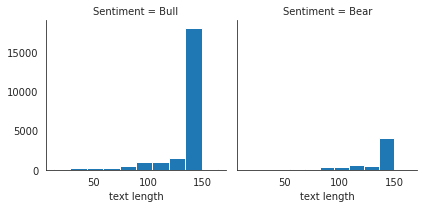

In [124]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'text length')

In [125]:
plt.figure(figsize=(12,12))
px.histogram(x=df['text length'],color=df['Sentiment'],nbins=40)

<Figure size 864x864 with 0 Axes>

#Boxplot for Sentiment and Text Length

Below plot shows that mean value of text length for sentiment bear is higher than bull, which is opposite to bar plot.

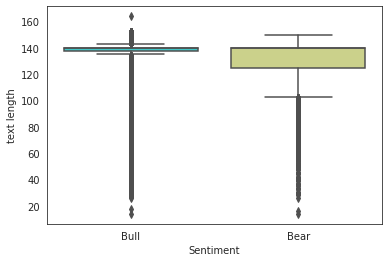

In [126]:
sns.boxplot(x='Sentiment',y='text length',data=df,palette='rainbow')

In [127]:
px.box(x=df['Sentiment'],y=df['text length'])

#Countplot for Sentiment and Text Length

Number of tweet for Bull is more than bear

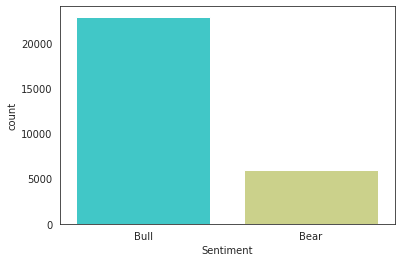

In [128]:
sns.countplot(x='Sentiment',data=df,palette='rainbow')

#Mean of Text Length for both sentiment

In [129]:
stars = df.groupby('Sentiment').mean()
stars

,text length
Sentiment,
Bear,129.522982
Bull,131.703274


#Import CounterVectorizer to transform the data

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

This can be visualized as follows –

https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

#Fit Data MultinomialNB

This can be visualized as follows –

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

#Import TfidTransformer

https://medium.com/@hritikattri10/feature-extraction-using-tf-idf-algorithm-44eedb37305e

#Create Pipeline Model and Repeat Above Process

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

#Creating NLP Model For Stock Prediction Based On Tweeter Sentiment Analysis (Including Text Processing [Cleaning, Steaming, Contraction Etc.])

In [130]:
import string

mess = 'Hello! I am Sagar : '

In [131]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [133]:
nopunc

'Hello I am Sagar  '

In [134]:
from nltk.corpus import stopwords

In [135]:
import nltk 
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [136]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [137]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [138]:
clean_mess

['Hello', 'Sagar']

In [139]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [140]:
# Check to make sure its working
df['Text'].head(5).apply(text_process)

2    [RT, tippereconomy, Another, use, case, blockc...
3                    [free, coins, httpstcoDiuoePJdap]
4    [RT, payvxofficial, happy, announce, PayVX, Pr...
5    [Copy, successful, traders, automatically, Bit...
6    [RT, bethereumteam, revealing, surprise, tomor...
Name: Text, dtype: object

#Import CounterVectorizer to transform the data

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

This can be visualized as follows –

https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])

# Print total number of vocab words in column 'Text'
print(len(bow_transformer.vocabulary_))

38520


In [143]:
tweet5 = df['Text'].iloc[786]
print(tweet5)

RT @DrDenaGrayson: 🛑BREAKING🛑

Rockin' Rod Rosenstein to make a MAJOR CYBER LAW ENFORCEMENT announcement tomorrow‼️

*TREASURY* Undersecret…


In [144]:
bow4 = bow_transformer.transform([tweet5])
print(bow4)
print(bow4.shape)

  (0, 5717)	1
  (0, 6987)	1
  (0, 7087)	1
  (0, 9135)	1
  (0, 9500)	1
  (0, 11165)	1
  (0, 11478)	1
  (0, 11479)	1
  (0, 11507)	1
  (0, 12512)	1
  (0, 13087)	1
  (0, 14236)	1
  (0, 33385)	1
  (0, 36891)	1
  (0, 38489)	1
(1, 38520)


In [145]:
print(bow_transformer.get_feature_names()[13100])

UnitedBitcoin


In [146]:
tweet_bow = bow_transformer.transform(df['Text'])

In [147]:
print('Shape of Sparse Matrix: ', tweet_bow.shape)
print('Amount of Non-Zero occurences: ', tweet_bow.nnz)

Shape of Sparse Matrix:  (28920, 38520)
Amount of Non-Zero occurences:  374280


In [148]:
#Sparsity and density are terms used to describe the percentage of cells in a database table that are not populated and populated, respectively. The sum of the sparsity and density should equal 100%. 
# sparsity = 100 * number of non-zero occurences / (number of rows * number of columns)
sparsity = (100.0 * tweet_bow.nnz / (tweet_bow.shape[0] * tweet_bow.shape[1]))
print('sparsity: {}'.format(sparsity))
# sparsity = 0.026 which means only 2% of datas are non zero from matrix

sparsity: 0.033597893856939114


In [149]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(tweet_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 38489)	0.2715369570088126
  (0, 36891)	0.2715369570088126
  (0, 33385)	0.22925732431312054
  (0, 14236)	0.26454014905351103
  (0, 13087)	0.2715369570088126
  (0, 12512)	0.2713955146976462
  (0, 11507)	0.26553587878866386
  (0, 11479)	0.2715369570088126
  (0, 11478)	0.2715369570088126
  (0, 11165)	0.07774860313625481
  (0, 9500)	0.2713955146976462
  (0, 9135)	0.2711138181151523
  (0, 7087)	0.2715369570088126
  (0, 6987)	0.2535174616643634
  (0, 5717)	0.270973559423194


In [150]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['talking']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['warns']])

8.136829037892351
8.01422671580002


In [151]:
tweet_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweet_tfidf.shape)

(28920, 38520)


In [152]:
from sklearn.naive_bayes import MultinomialNB
stock_prediction_model = MultinomialNB().fit(tweet_tfidf, df['Sentiment'])

In [153]:
print('predicted:', stock_prediction_model.predict(tfidf4))
print('expected:', df.Sentiment.iloc[9])

predicted: ['Bull']
expected: Bull


In [154]:
all_predictions = stock_prediction_model.predict(tweet_tfidf)
print(all_predictions)

['Bull' 'Bull' 'Bull' ... 'Bull' 'Bull' 'Bull']


In [155]:
from sklearn.metrics import classification_report
print (classification_report(df['Sentiment'], all_predictions))

              precision    recall  f1-score   support

        Bear       0.98      0.85      0.91      5983
        Bull       0.96      1.00      0.98     22937

    accuracy                           0.97     28920
   macro avg       0.97      0.92      0.95     28920
weighted avg       0.97      0.97      0.97     28920



              precision    recall  f1-score   support

        Bear       0.98      0.85      0.91      5983
        Bull       0.96      1.00      0.98     22937

    accuracy                           0.97     28920
   macro avg       0.97      0.92      0.95     28920
weighted avg       0.97      0.97      0.97     28920



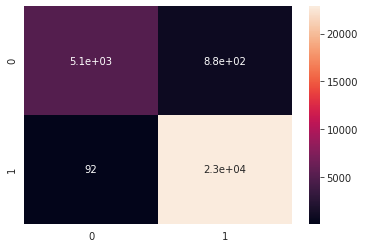

In [156]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(df['Sentiment'], all_predictions), annot=True)
print(classification_report(df['Sentiment'], all_predictions))

In [157]:
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, sentiment_train, sentiment_test = \
train_test_split(df['Text'], df['Sentiment'], test_size=0.2)

print(len(tweet_train), len(tweet_test), len(tweet_train) + len(tweet_test))

23136 5784 28920


In [158]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [159]:
pipeline.fit(tweet_train,sentiment_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd46f2c3d40>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [160]:
predictions = pipeline.predict(tweet_test)

              precision    recall  f1-score   support

        Bear       0.96      0.75      0.85      1160
        Bull       0.94      0.99      0.97      4624

    accuracy                           0.95      5784
   macro avg       0.95      0.87      0.91      5784
weighted avg       0.95      0.95      0.94      5784



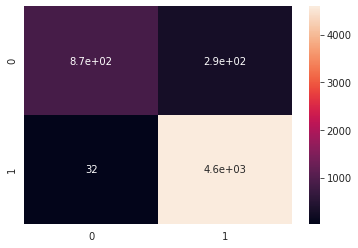

In [161]:
print(classification_report(sentiment_test,predictions))


sns.heatmap(confusion_matrix(sentiment_test,predictions), annot=True)

#Deployment Model For Twitter Sentiment Base Stock Prediction

In [162]:
#generate random number between 0 to 1159 (which is total number of data).
import random

i = random.randint(0,1159)
print('random digit:',i)
print("------------------------------------------------------------------------")

#take random number of tweet (text) for predicting the sentiment behind it
rand = tweet_test.iloc[i]

#preprocess the tweet and put in our created model to predict sentiment 
bow4 = bow_transformer.transform([rand])
print(bow4)
print(bow4.shape)
print("------------------------------------------------------------------------")
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

#result of prediction
print("------------------------------------------------------------------------")
from termcolor import colored
pre1 = stock_prediction_model.predict(tfidf4)[0]
if pre1 == 'Bull':
  print('Predicted:', colored('🐂 BULL', 'green'))
else:
  print('Predicted:', colored('🐻 BEAR', 'red'))


#Prediction for pipeline base model
print("------------------------------------------------------------------------")
ml = pd.DataFrame(tweet_test.head(1))

ml['Text']=ml['Text'].replace(ml['Text'].iloc[0], rand)
pre2 = pipeline.predict(ml)[0]
if pre2 == 'Bull':
  print('Pipe Line Predicted:', colored('🐂 BULL', 'green'))
else:
  print('Pipe Line Predicted:', colored('🐻 BEAR', 'red'))

#check the actual value of sentiment for that predicted tweet
print("------------------------------------------------------------------------")
pre3 = predictions[i]
if pre3 == 'Bull':
  print('Actual:', colored('🐂 BULL', 'green'))
else:
  print('Actual:', colored('🐻 BEAR', 'red'))


#print(colored('🐻 BEAR', 'red'), colored('🐂 BULL', 'green'))

random digit: 673
------------------------------------------------------------------------
  (0, 5079)	1
  (0, 5315)	1
  (0, 6128)	1
  (0, 9455)	1
  (0, 11165)	1
  (0, 12562)	1
  (0, 14186)	1
  (0, 14409)	1
  (0, 15299)	1
  (0, 17931)	1
  (0, 32604)	1
  (0, 33928)	1
  (0, 35336)	1
  (0, 37041)	1
  (0, 38506)	1
(1, 38520)
------------------------------------------------------------------------
  (0, 38506)	0.3049058853519468
  (0, 37041)	0.2913177447876388
  (0, 35336)	0.302966031146606
  (0, 33928)	0.302966031146606
  (0, 32604)	0.27672447892480334
  (0, 17931)	0.23343243053701546
  (0, 15299)	0.30249383147562553
  (0, 14409)	0.3049058853519468
  (0, 14186)	0.1923570307787636
  (0, 12562)	0.28916997427708274
  (0, 11165)	0.06972668461062212
  (0, 9455)	0.3044130426700616
  (0, 6128)	0.25217611261396744
  (0, 5315)	0.18203378549415083
  (0, 5079)	0.0904078729103194
------------------------------------------------------------------------
Predicted: 🐂 BULL
--------------------------------